# Decision Tree

- Split data sets to be as uniform as possible
- Representative methods of measuring uniformity include an **information gain index** using entropy, and a **Gini coefficient**. 

- **Entropy** refers to the degree of congestion of a given data set. If different values are mixed, the entropy is high, and if the same value is mixed, the entropy is low. **Information gain index** is 1 - entropy. The decision tree divide based on an attribute with a high information gain.
- **Gini coefficient** is most uniform to 0 and is more uneven toward 1.

## Decision Tree's Feature

### Merit
- The algorithm is easy and intuitive because it is based on the rule of "uniformity."
- Pre-processing tasks such as scaling and normalization of each feature are not required except in special cases because only uniformity is required.

### Weakness
- Accuracy is poor due to overfitting. So it is necessary to limit the size of the tree in advance.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Create DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

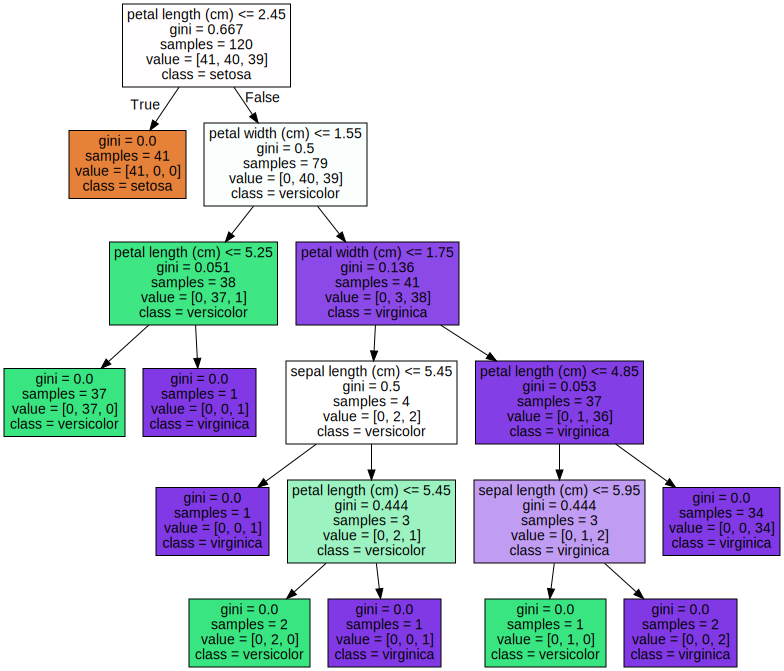

In [14]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Feature Importance

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025005
sepal width (cm) : 0.000000
petal length (cm) : 0.554903
petal width (cm) : 0.420092


<AxesSubplot:>

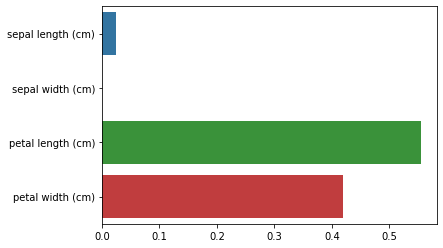

In [16]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# Decision Tree Practice

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('../data/human_activity/features.txt', sep='\s+',
                             header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [22]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [25]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                             if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [28]:
import pandas as pd

def get_human_dataset():
    
    feature_name_df = pd.read_csv('../data/human_activity/features.txt',sep='\s+',
                                 header=None,names=['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('../data/human_activity/train/X_train.txt',sep='/s+',names=feature_name)
    X_test = pd.read_csv('../data/human_activity/test/X_test.txt',sep='/s+', names=feature_name)
    
    y_train = pd.read_csv('../data/human_activity/train/y_train.txt',sep='/s+',header=None,names=['action'])
    y_test = pd.read_csv('../data/human_activity/test/y_test.txt',sep='/s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [29]:
print('## Train feature dataset info()')
print(X_train.info())

## Train feature dataset info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(560), object(1)
memory usage: 31.5+ MB
None


In [30]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64
